In [122]:
import numpy as np
import matplotlib.pyplot as plt
import math


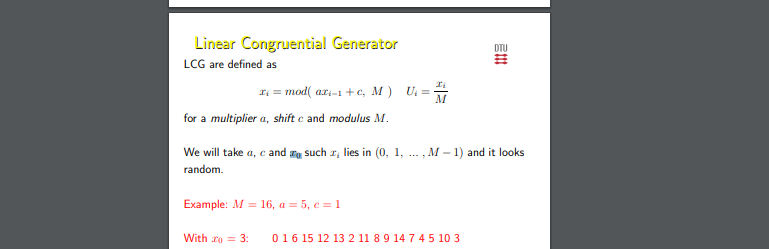

In [111]:
def random_num (n,x_0,a,c,m): 
    random_number = []
    for i in range(n):
        x_i = (x_0 * a + c)%m
        x_0 = x_i
        random_number.append(x_i/m)
    return random_number

In [135]:
s = random_num (10000,3,100,20000,65530)
#print(s)
U = uni_ran_num (10000,9,1111,113,2**24)

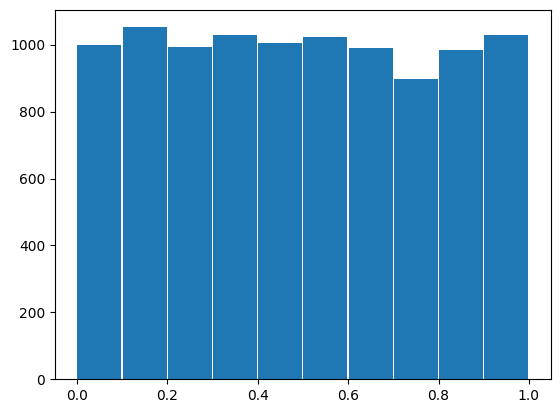

In [139]:
plt.hist(s, bins=10, rwidth=0.975)
plt.show()

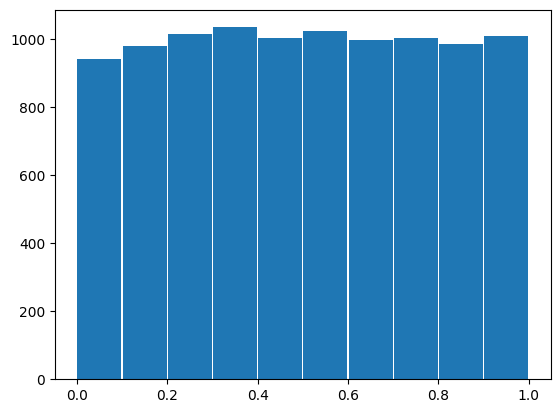

In [140]:
plt.hist(U, bins=10, rwidth=0.975)
plt.show()

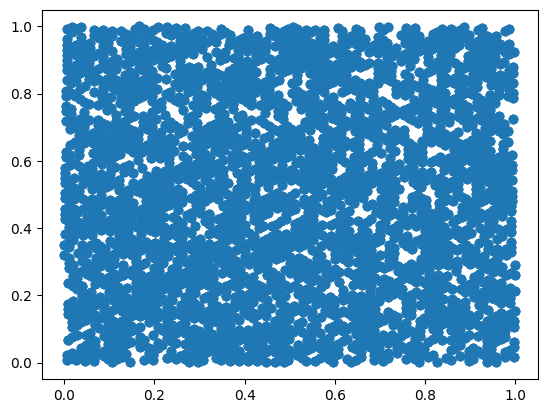

In [114]:
plt.scatter(s[:-1], s[1:])
plt.show()

In [141]:
#X2 test

def chisquare(obs, no_class):
    Observed, bins = np.histogram(obs, bins= no_class)
    expct =  len(obs)/no_class
    T = 0
    for i in Observed:
        xx = ((i-expct)**2)/expct
        T+= xx
    p = chi2.pdf(T,9)
    print('p-value is:',p)
    if(p <= 0.05):
        print('The generated random numbers are not uniformly distributed')
    else:
        print('The generated random numbers are uniformly distributed')


In [144]:
chisquare(U, 10)

p-value is: 0.09991585517170648
The generated random numbers are uniformly distributed


In [145]:
chisquare(s, 10)


p-value is: 0.02040558453414498
The generated random numbers are not uniformly distributed


In [125]:
#Kolmogorov-Smirnov
def KStest(random_num):
    data_sorted = np.sort(random_num)
    fo = data_sorted
    # Calculate the observed cumulative distribution function (Fo)
    N = len(random_num)
    # Calculate the theoretical cumulative distribution function (Fr)
    f = np.cumsum(data_sorted)
    fr =f/f[-1] 
    # Calculate the test statistic D
    D = np.max(np.abs(fo - fr))
    ks_calculated_score = (math.sqrt(N) + 0.12 + 0.11/ math.sqrt(N)) * D
    print('Kolmogrov-Smirnov calculated score is:', ks_calculated_score)
    ks_sig = 1.358 # From reference table of lecture slide 5% significant
    if(ks_calculated_score < ks_sig):
        print('The generated random numbers are uniformly distributed')
    else:
        print('The generated random numbers are not uniformly distributed')

In [126]:
KStest(s)

Kolmogrov-Smirnov calculated score is: 24.75295558364875
The generated random numbers are not uniformly distributed


In [143]:
KStest(U)

Kolmogrov-Smirnov calculated score is: 25.037327681314157
The generated random numbers are not uniformly distributed


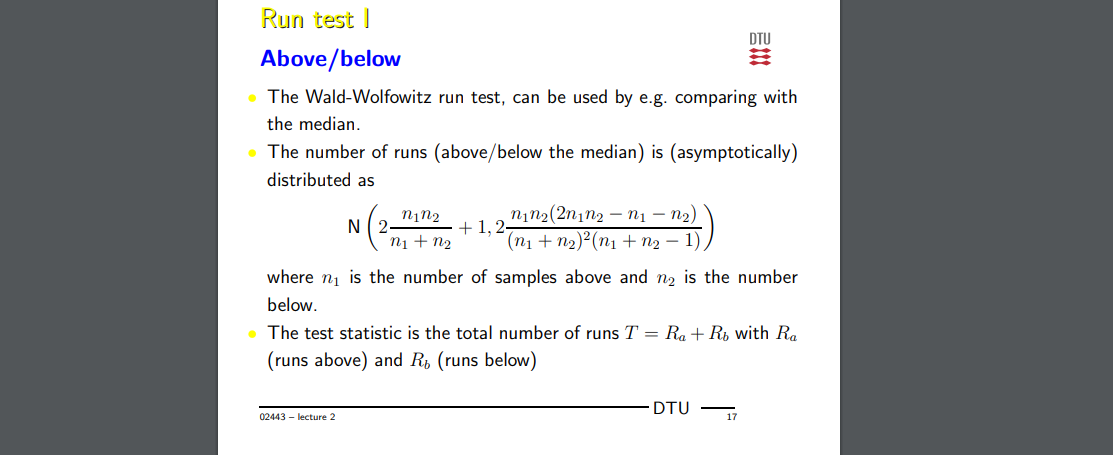

In [132]:
#Independence Test
#run-tests
def Run_Test_I(random_num):
    N = len(random_num)
    med_rand_numbers = np.median(random_num)
    run_vec = ['D' if x < med_rand_numbers else 'U' for x in random_num]
    
    run_number = 0
    k = 1
    while(k <= len(run_vec)):
        j = k
        while(j < len(run_vec)):
            if(run_vec[j-1] == run_vec[j]):
                j = j + 1
                if(j == len(run_vec)):
                    run_number = run_number + 1
            else:
                run_number = run_number + 1
                break
        #end of inner while
        k = j + 1
        if(k == len(run_vec)):
            run_number = run_number + 1
    ## end of while
    n1 = run_vec.count('U')
    n2 = run_vec.count('D')
    R_hat = (2 *n1 * n2)/ (n1 + n2) + 1
    S_R_squ = (2 * n1 * n2) * (2 * n1 * n2 - n1 - n2)/((n1 + n2)**2 * (n1 + n2 - 1))
    Z_ts = (run_number - R_hat)/math.sqrt(S_R_squ)
    print('Z score is: ', abs(Z_ts))
    ### for alpha = 0.05 Z_st = 1.96
    if(abs(Z_ts) < 1.96):
        print('Failed to reject Ho')
        print('The generated random numbers are independent')
    else:
        print('Reject H0, and H1 is true')
        print('The generated random numbers are not independent')

In [133]:
Run_Test_I(s)


Z score is:  3.6801840322057506
Reject H0, and H1 is true
The generated random numbers are not independent


In [ ]:
def SignTest(random_num):
    n = len(random_num)
    sign_vec = ['N' if random_num[x] < random_num[x+1] else 'P' for x in range(n-1)]
    
    R = 0
    k = 1
    while(k <= len(sign_vec)):
        j = k
        while(j < len(sign_vec)):
            if(sign_vec[j-1] == sign_vec[j]):
                j = j + 1
                if(j == len(sign_vec)):
                    R = R + 1
            else:
                R = R + 1
                break
        #end of inner while
        k = j + 1
        if(k == len(sign_vec)):
            R = R + 1
    ## end of while
    mu_R = (2 * n -1)/3
    sigma_sq_R = (16 * n - 29)/90
    Z0 = (R - mu_R)/ math.sqrt(sigma_sq_R)
    print('Z score is: ', abs(Z0))
    ### for alpha = 0.05 ,Z0.025 = 1.96
    if(Z0 <= 1.96 and Z0 >= -1.96):
        print('We can not reject H0')
        print('The random numbers are independent')
    else:
        print('We accept alternative hypothesis H1')
        print('The random numbers are not independent')